In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
movies = []
# As the file is in transaction data we will be reading data directly 
with open("C:\\Users\\Prajwal\\Desktop\\Data Science\\Assignments\\Association Rules\\my_movies.csv") as f:
    movies = f.read()

In [3]:
movies

'"V1","V2","V3","V4","V5","Sixth Sense","Gladiator","LOTR1","Harry Potter1","Patriot","LOTR2","Harry Potter2","LOTR","Braveheart","Green Mile"\n"Sixth Sense","LOTR1","Harry Potter1","Green Mile","LOTR2",1,0,1,1,0,1,0,0,0,1\n"Gladiator","Patriot","Braveheart","","",0,1,0,0,1,0,0,0,1,0\n"LOTR1","LOTR2","","","",0,0,1,0,0,1,0,0,0,0\n"Gladiator","Patriot","Sixth Sense","","",1,1,0,0,1,0,0,0,0,0\n"Gladiator","Patriot","Sixth Sense","","",1,1,0,0,1,0,0,0,0,0\n"Gladiator","Patriot","Sixth Sense","","",1,1,0,0,1,0,0,0,0,0\n"Harry Potter1","Harry Potter2","","","",0,0,0,1,0,0,1,0,0,0\n"Gladiator","Patriot","","","",0,1,0,0,1,0,0,0,0,0\n"Gladiator","Patriot","Sixth Sense","","",1,1,0,0,1,0,0,0,0,0\n"Sixth Sense","LOTR","Gladiator","Green Mile","",1,1,0,0,0,0,0,1,0,1\n'

In [4]:
# splitting the data into separate transactions using separator as "\n"
movies = movies.split("\n")
movies_list = []
for i in movies:
    movies_list.append(i.split(","))

In [5]:
all_movies_list = [i for item in movies_list for i in item]
from collections import Counter

In [6]:
item_frequencies = Counter(all_movies_list)

In [7]:
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [8]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [9]:
# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
movies_series  = pd.DataFrame(pd.Series(movies_list))

In [10]:
movies_series

,0
0,"[""V1"", ""V2"", ""V3"", ""V4"", ""V5"", ""Sixth Sense"", ..."
1,"[""Sixth Sense"", ""LOTR1"", ""Harry Potter1"", ""Gre..."
2,"[""Gladiator"", ""Patriot"", ""Braveheart"", """", """",..."
3,"[""LOTR1"", ""LOTR2"", """", """", """", 0, 0, 1, 0, 0, ..."
4,"[""Gladiator"", ""Patriot"", ""Sixth Sense"", """", """"..."
5,"[""Gladiator"", ""Patriot"", ""Sixth Sense"", """", """"..."
6,"[""Gladiator"", ""Patriot"", ""Sixth Sense"", """", """"..."
7,"[""Harry Potter1"", ""Harry Potter2"", """", """", """",..."
8,"[""Gladiator"", ""Patriot"", """", """", """", 0, 1, 0, ..."
9,"[""Gladiator"", ""Patriot"", ""Sixth Sense"", """", """"..."


In [11]:
movies_series.columns = ["transactions"]

In [12]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = movies_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [13]:
X

,"""""","""Braveheart""","""Gladiator""","""Green Mile""","""Harry Potter1""","""Harry Potter2""","""LOTR""","""LOTR1""","""LOTR2""","""Patriot""","""Sixth Sense""","""V1""","""V2""","""V3""","""V4""","""V5""",0,1
0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,1
2,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1
4,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1
5,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1
6,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1
7,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
8,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
9,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1


In [14]:
X = X.iloc[:,0:9]

In [15]:
X

,"""""","""Braveheart""","""Gladiator""","""Green Mile""","""Harry Potter1""","""Harry Potter2""","""LOTR""","""LOTR1""","""LOTR2"""
0,0,1,1,1,1,1,1,1,1
1,0,0,0,1,1,0,0,1,1
2,1,1,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,1
4,1,0,1,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0
7,1,0,0,0,1,1,0,0,0
8,1,0,1,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0


In [16]:
frequent_itemsets = apriori(X, min_support=0.015, max_len=4,use_colnames = True)

In [17]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)

In [19]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
439,"(""Gladiator"", ""LOTR2"")","(""Green Mile"", ""Braveheart"")",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
161,"(""LOTR2"", ""Braveheart"")","(""Harry Potter2"", ""Green Mile"")",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
133,"(""LOTR"", ""Braveheart"")","(""Harry Potter2"", ""Green Mile"")",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
330,"(""LOTR"", ""Braveheart"")","(""Harry Potter2"", ""LOTR1"")",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
329,"(""Braveheart"", ""LOTR1"")","(""Harry Potter2"", ""LOTR"")",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
328,"(""Harry Potter2"", ""LOTR"")","(""Braveheart"", ""LOTR1"")",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
327,"(""Harry Potter2"", ""LOTR1"")","(""LOTR"", ""Braveheart"")",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
326,"(""Harry Potter2"", ""Braveheart"")","(""LOTR"", ""LOTR1"")",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
925,"(""Green Mile"", ""Harry Potter2"")","(""Gladiator"", ""LOTR1"")",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
924,"(""Gladiator"", ""LOTR1"")","(""Green Mile"", ""Harry Potter2"")",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf


### Support vs Lift

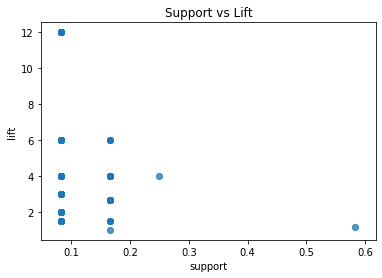

In [20]:
plt.scatter(rules['support'],rules['lift'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

### Support vs Confidence

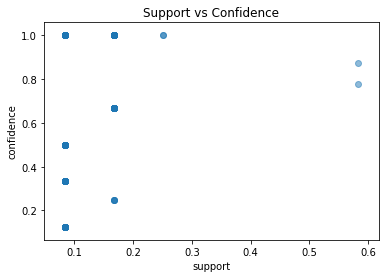

In [21]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Confidence vs Lift

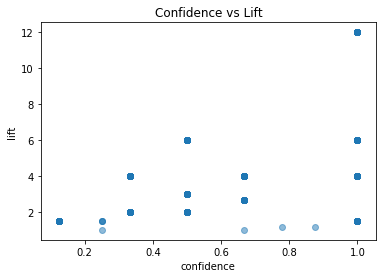

In [22]:
plt.scatter(rules['confidence'],rules['lift'],alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

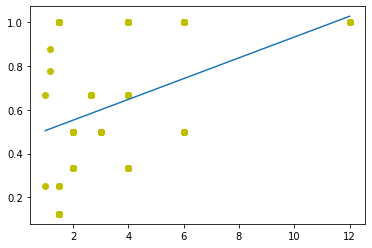

In [23]:
fit = np.polyfit(rules['lift'],rules['confidence'],1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'],
rules['confidence'],'yo',
rules['lift'],
         fit_fn(rules['lift']))

In [24]:
frequent_itemsets = apriori(X, min_support=0.027, max_len=3,use_colnames = True)

In [25]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

In [26]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)

In [27]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
137,"(""Braveheart"")","(""LOTR"", ""LOTR2"")",0.166667,0.083333,0.083333,0.5,6.0,0.069444,1.833333
272,"(""Braveheart"")","(""LOTR"", ""Harry Potter1"")",0.166667,0.083333,0.083333,0.5,6.0,0.069444,1.833333
165,"(""Harry Potter2"")","(""LOTR"", ""LOTR2"")",0.166667,0.083333,0.083333,0.5,6.0,0.069444,1.833333
65,"(""LOTR"")","(""Gladiator"", ""Harry Potter2"")",0.166667,0.083333,0.083333,0.5,6.0,0.069444,1.833333
164,"(""LOTR"", ""LOTR2"")","(""Harry Potter2"")",0.083333,0.166667,0.083333,1.0,6.0,0.069444,inf


### Support vs Confidence

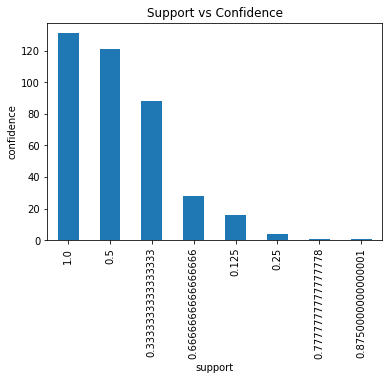

In [28]:
ax = rules["support"],rules["confidence"].value_counts().plot(kind="bar")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Confidence vs Lift

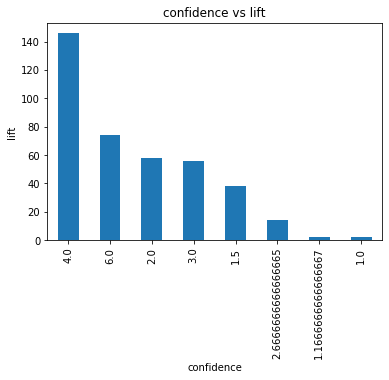

In [29]:
bx = rules["confidence"],rules["lift"].value_counts().plot(kind="bar")
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('confidence vs lift')
plt.show()

### Support vs Lift

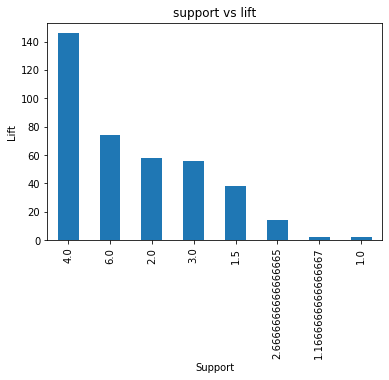

In [30]:
bx = rules["support"],rules["lift"].value_counts().plot(kind="bar")
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('support vs lift')
plt.show()